In [30]:
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt
from scipy.ndimage import label
from PIL import Image 
image_file = Image.open("Granos.png") # open colour image
image_file.save('result.png')
img = cv2.imread('result.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [35]:
def segment_on_dt(a, img):
    border = cv2.dilate(img, None, iterations=5)
    border = border - cv2.erode(border, None)

    dt = cv2.distanceTransform(img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(np.uint8)
    _, dt = cv2.threshold(dt, 180, 255, cv2.THRESH_BINARY)
    lbl, ncc = label(dt)
    lbl = lbl * (255 / (ncc + 1))
    # Completing the markers now. 
    lbl[border == 255] = 255

    lbl = lbl.astype(np.int32)
    cv2.watershed(a, lbl)

    lbl[lbl == -1] = 0
    lbl = lbl.astype(np.uint8)
    return 255 - lbl

img = cv2.imread('Granos.png')

# Pre-processing.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
_, img_bin = cv2.threshold(img_gray, 0, 255,
        cv2.THRESH_OTSU)
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN,np.ones((3, 3), dtype=int))

result = segment_on_dt(img, img_bin)
cv2.imwrite(sys.argv[2], result)

result[result != 255] = 0
result = cv2.dilate(result, None)
img[result == 255] = (0, 0, 255)
cv2.imwrite(sys.argv[3], img)

error: /opt/concourse/worker/volumes/live/d8bcd4d1-79b2-4aa5-797a-b95097f1118f/volume/opencv_1512680501887/work/modules/imgcodecs/src/loadsave.cpp:677: error: (-2) could not find a writer for the specified extension in function imwrite_


In [51]:
import cv2
import numpy as np

img = cv2.imread('Granos.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fg = cv2.erode(thresh,None,iterations = 2)
bgt = cv2.dilate(thresh,None,iterations = 3)
ret,bg = cv2.threshold(bgt,1,128,1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(img,marker32)
m = cv2.convertScaleAbs(marker32)
ret,thresh = cv2.threshold(m,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
res = cv2.bitwise_and(img,img,mask = thresh)
img = Image.fromarray(res, 'RGB')
img.save('my.png')
img.show()

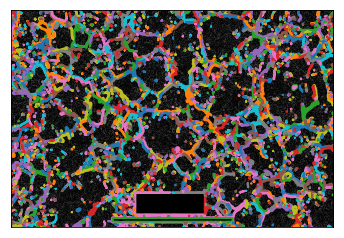

In [72]:
from PIL import Image
from skimage import measure
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel
import matplotlib.pyplot as plt

img = imread('Granos.png')
img_gray = rgb2gray(img)
img_edges = sobel(img_gray)
contours = measure.find_contours(img_edges,0.2)

fig, ax =plt.subplots()
ax.imshow(img_edges, interpolation = 'nearest',cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:,1],contour[:,0],linewidth=2)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


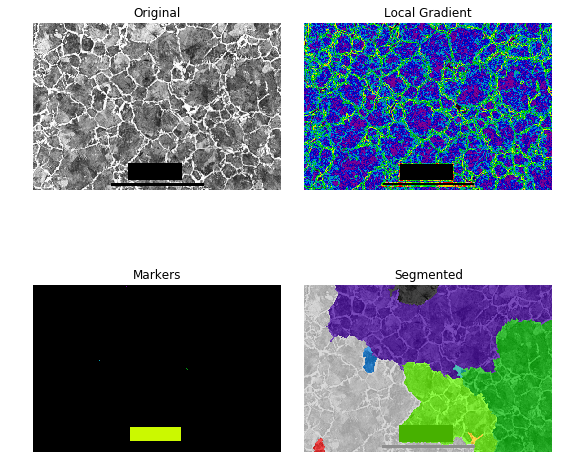

In [78]:
from sys import exit
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.morphology import watershed, disk
from skimage import data
from skimage.io import imread
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

img = imread('Granos.png')
img_gray = rgb2gray(img)
image = img_as_ubyte(img_gray)
markers = rank.gradient(image,disk(5)) < 20
markers = ndi.label(markers)[0]

gradient = rank.gradient(image,disk(2))
labels = watershed(gradient,markers)

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8),sharex=True,sharey = True,subplot_kw = {'adjustable':'box-forced'})
ax = axes.ravel()

ax[0].imshow(image,cmap=plt.cm.gray,interpolation='nearest')
ax[0].set_title('Original')

ax[1].imshow(gradient,cmap=plt.cm.spectral,interpolation='nearest')
ax[1].set_title('Local Gradient')

ax[2].imshow(markers,cmap=plt.cm.spectral,interpolation='nearest')
ax[2].set_title('Markers')

ax[3].imshow(image,cmap=plt.cm.gray,interpolation='nearest')
ax[3].imshow(labels,cmap=plt.cm.spectral,interpolation='nearest',alpha=.7)
ax[3].set_title('Segmented')

for a in ax:
    a.axis('off')
    
fig.tight_layout()
plt.show()
